# MA Model
by **Professor Throckmorton**  
for *Time Series Econometrics*  
W&amp;M ECON 408/PUBP 616  
<a href="ma-model.slides.html">Slides</a>

## Wold Representation Theorem

- **Wold representation theorem**: any covariance stationary series can be expressed as a linear combination of current and past white noise.
  
  $$
  y_t =  \sum_{i=0}^\infty  b_i \varepsilon_{t-i}
  $$
  
- $\varepsilon_t$ is a **white noise** process with mean 0 and variance $\sigma^2$.
- $b_0 = 1$, and $|\sum_{i=0}^\infty  b_i | < \infty$, which ensures the process is stable.
- $\varepsilon_t$, a.k.a. an innovation, represents new information that cannot be predicted using past values.

### Key aspects

- **Generality**: The **Wold Representation** is a **general model** that can represent any covariance stationary time series. This is why it is important for forecasting.
- **Linearity**: The representation is a **linear function of its innovations** or "general linear process".
- **Zero Mean**: The theorem applies to zero-mean processes, but this is without loss of generality because any covariance stationary series can be expressed in deviations from its mean, $y_t-\mu$.
- **Innovations**: The Wold representation expresses a time series in terms of its current and past shocks/innovations.
- **Approximation**: In practice, because an infinite distributed lag isn't directly usable, models like **moving average (MA)**, **autoregressive (AR)**, and **autoregressive moving average (ARMA) models** are used to approximate the Wold representation.

## MA Model

- The **moving average (MA) model** expresses the current value of a series as a function of current and lagged unobservable shocks (or innovations)
- The MA model of order $q$, denoted as **MA($q$)**, is defined as:

  $$
  y_t = \mu + \varepsilon_t + \theta_1 \varepsilon_{t−1} + \theta_2 \varepsilon_{t−2} + ... + \theta_q \varepsilon_{t−q}
  $$
  
  - $\mu$ is the mean or intercept of the series.
  - $\varepsilon_t$ is a **white noise** process with mean 0 and variance $\sigma^2$.
  - $\theta_1,\theta_2,\ldots,\theta_q$ are the parameters of the model.

### Key aspects

- **Stationarity**: MA models are always stationary.
- **Approximation**: Finite-order MA processes are a natural approximation to the Wold representation, which is MA($\infty$).
- **Autocorrelation**: The ACF of an MA($q$) model cuts off after lag $q$, i.e., the autocorrelations are zero beyond displacement $q$. This is helpful in identifying a suitable MA model for time series data.
- **Forecasting**: MA models are not forecastable more than $q$ steps ahead, apart from the unconditional mean, $\mu$.
- **Invertibility**: An MA model is invertible if it can be expressed as an autoregressive model with an infinite number of lags.

### Unconditional Moments

- The variance of an MA process depends on the order of the process and the variance of the white noise, $\varepsilon_t \overset{i.i.d.}{\sim} N(0,\sigma^2)$
- MA($1$) Process: $y_t = \mu + \varepsilon_t + \theta\varepsilon_{t-1}$
  - $E(y_t) = \mu + E(\varepsilon_t) + \theta E(\varepsilon_{t-1}) = \mu$
  - $Var(y_t) = Var(\varepsilon_t) + \theta^2 Var(\varepsilon_{t-1}) = \sigma^2(1 + \theta^2)$
  - $Std(y_t) = \sqrt{\sigma^2(1 + \theta^2)}$
- MA($q$) Process: $y_t = \mu + \varepsilon_t + \theta_1\varepsilon_{t-1} + \dots + \theta_q\varepsilon_{t-q}$
  - $E(y_t) = \mu$
  - $Var(y_t) = \sigma^2(1 + \theta_1^2 + \dots + \theta_q^2)$
  - $Std(y_t) = \sqrt{Var(y_t)}$

### Autocorrelation Function


- MA($1$) Process: $y_t = \mu + \varepsilon_t + \theta\varepsilon_{t-1}$
  - $\gamma(0) = E[(y_t-\mu)(y_t-\mu)] = Var(y_t) = \sigma^2(1 + \theta^2)$
  - $\gamma(1) = E[(y_t-\mu)(y_{t-1}-\mu)]$

  \begin{align*}
    &= E[(\varepsilon_t + \theta\varepsilon_{t-1})(\varepsilon_{t-1} + \theta\varepsilon_{t-2})] \\
    &= E[\varepsilon_t\varepsilon_{t-1} + \varepsilon_t\theta\varepsilon_{t-2} + \theta\varepsilon_{t-1}\varepsilon_{t-1} + \theta\varepsilon_{t-1}\theta\varepsilon_{t-2}] \\
    &= \theta E[\varepsilon_{t-1}^2] = \theta Var[\varepsilon_{t-1}] \\
    &= \theta\sigma^2
  \end{align*}
  - $\gamma(\tau) = 0$ for $|\tau| > 1$
  - $\rho(0) = 1$, i.e., any series is perfectly correlated with itself
  - $\rho(1) = \gamma(1)/\gamma(0) = \theta/(1 + \theta^2)$
  - $\rho(\tau) = 0$ for $|\tau| > 1$
- MA($q$) process: $y_t = \varepsilon_t + \theta_1\varepsilon_{t-1} + \dots + \theta_q\varepsilon_{t-q}$
  - $\rho(0) = 1$
  - $\rho(k) = \frac{\theta_k + \sum_{i=1}^{q-k} \theta_i\theta_{i+k}}{1 + \sum_{i=1}^{q} \theta_i^2}$ for $1 \le k \le q$
  - $\rho(\tau) = 0$ for $|\tau| > q$

## MA Model as DGP

Let's compare a couple different MA models to their underlying white noise.
1. White noise:

  $$
  y_t = \mu + \varepsilon_t
  $$
  
3. MA(1):

  $$
  y_t = \mu + \varepsilon_t + \theta_1 \varepsilon_{t−1}
  $$

4. MA(3):

  $$
  y_t = \mu + \varepsilon_t + \theta_1 \varepsilon_{t−1} + \theta_2 \varepsilon_{t−2} + \theta_3 \varepsilon_{t−3}
  $$

In [1]:
# Import libraries
#   Plotting
import matplotlib.pyplot as plt
#   Scientific computing
import numpy as np
#   Data analysis
import pandas as pd

### DIY simulation

In [2]:
# Assign parameters
T = 501; mu = 2; theta1 = 0.6; theta2 = 0.5; theta3 = 0.7;
# Draw random numbers
rng = np.random.default_rng(seed=0)
eps = rng.standard_normal(T)
# Simulate time series
y = np.zeros([T,3])
for t in range(3,T):
    y[t,0] = mu + eps[t]
    y[t,1] = mu + eps[t] + theta1*eps[t-1]
    y[t,2] = (mu + eps[t] + theta1*eps[t-1] 
               + theta2*eps[t-2] + theta3*eps[t-3])

array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

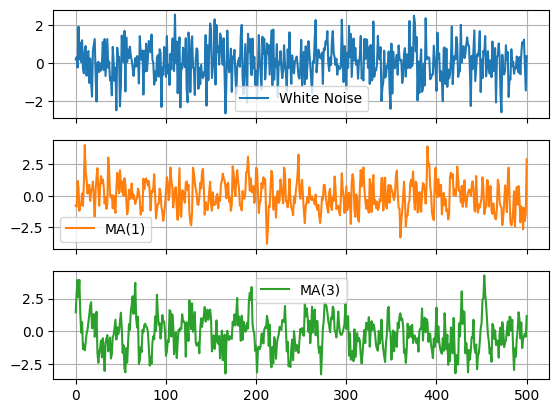

In [14]:
# Convert to DataFrame and plot
df = pd.DataFrame(y)
df.columns = ['White Noise','MA(1)','MA(3)']
df.plot(subplots=True,grid=True)

White Noise: E(y) = 0.06, Std(y) = 0.97, AC(y) = -0.05
MA(1): E(y) = 0.02, Std(y) = 1.18, AC(y) = 0.46
MA(3): E(y) = -0.17, Std(y) = 1.33, AC(y) = 0.57


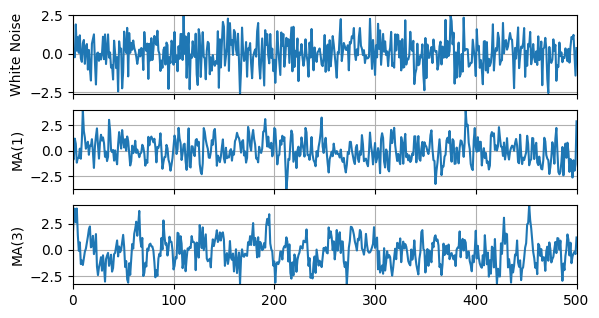

In [15]:
# Plot variables
fig, axs = plt.subplots(len(df.columns),figsize=(6.5,3.5))
for idx, ax in enumerate(axs.flat):
    col = df.columns[idx]
    y = df[col]
    ax.plot(y); ax.set_ylabel(col)
    ax.grid(); ax.autoscale(tight=True); ax.label_outer()
    print(f'{col}: \
E(y) = {y.mean():.2f}, \
Std(y) = {y.std():.2f}, \
AC(y) = {y.corr(y.shift(1)):.2f}')

### Using statsmodels

In [10]:
#   ARIMA Process
from statsmodels.tsa.arima_process import ArmaProcess as arma

# Set rng seed
rng = np.random.default_rng(seed=0)
# Create models (coefficients include zero lag)
wn = arma(ma=[1]);
ma1 = arma(ma=[1,theta1])
ma3 = arma(ma=[1,theta1,theta2,theta3])
# Simulate models
y = np.zeros([T,3])
y[:,0] = wn.generate_sample(T)
y[:,1] = ma1.generate_sample(T)
y[:,2] = ma3.generate_sample(T)

array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

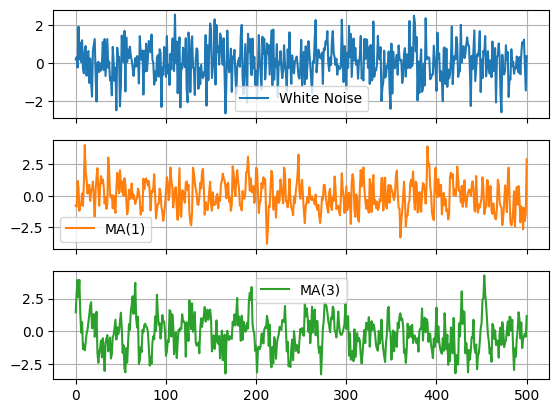

In [11]:
# Convert to DataFrame
df = pd.DataFrame(y)
df.columns = ['White Noise','MA(1)','MA(3)']
df.plot(subplots=True,grid=True)

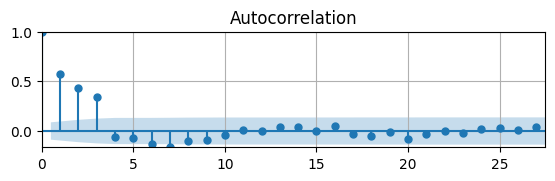

In [12]:
# Auto-correlation function
from statsmodels.graphics.tsaplots import plot_acf as acf
# Plot Autocorrelation Function
fig, ax = plt.subplots(figsize=(6.5,1.5))
acf(df['MA(3)'],ax)
ax.grid(); ax.autoscale(tight=True);

Since the DGDP is an MA(3), the ACF shows the correlations are only significant for the first 3 lags.

## Estimating MA Model
- In an MA model, the current value is expressed as a function of current and lagged unobservable shocks.
  - However, the error terms are not observed directly and must be inferred from the data and estimated parameters.
  - This creates a **nonlinear relationship** between the data and the model's parameters.
- The `statsmodels` module has a way to define an MA model and estimate its parameters.
- The general model is **Autoregressive Integrated Moving Average Model**, or **ARIMA($p,d,q$)**, of which MA($q$) is a special case.
- The argument `order=(p,d,q)` specifies the order for the **autoregressive**, **integrated**, and **moving average** components.
- See [statsmodels](https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMA.html) for more information.

In [13]:
# ARIMA model
from statsmodels.tsa.arima.model import ARIMA
# Define model
mod = ARIMA(df['MA(3)'],order=(0,0,3))
# Estimate model
res = mod.fit()
summary = res.summary()
# Print summary tables
tab0 = summary.tables[0].as_html()
tab1 = summary.tables[1].as_html()
tab2 = summary.tables[2].as_html()
# print(tab0); print(tab1); print(tab2)

<table class="simpletable">
<caption>SARIMAX Results</caption>
<tr>
  <th>Dep. Variable:</th>         <td>MA(3)</td>      <th>  No. Observations:  </th>    <td>501</td>  
</tr>
<tr>
  <th>Model:</th>            <td>ARIMA(0, 0, 3)</td>  <th>  Log Likelihood     </th> <td>-700.202</td>
</tr>
<tr>
  <th>Date:</th>            <td>Wed, 05 Feb 2025</td> <th>  AIC                </th> <td>1410.405</td>
</tr>
<tr>
  <th>Time:</th>                <td>14:24:16</td>     <th>  BIC                </th> <td>1431.488</td>
</tr>
<tr>
  <th>Sample:</th>                  <td>0-501</td>        <th>  HQIC               </th> <td>1418.677</td>
</tr>
</table>
<table class="simpletable">
<tr>
     <td></td>       <th>coef</th>     <th>std err</th>      <th>z</th>      <th>P>|z|</th>  <th>[0.025</th>    <th>0.975]</th>  
</tr>
<tr>
  <th>const</th>  <td>   -0.1391</td> <td>    0.125</td> <td>   -1.114</td> <td> 0.265</td> <td>   -0.384</td> <td>    0.106</td>
</tr>
<tr>
  <th>ma.L1</th>  <td>    0.6199</td> <td>    0.033</td> <td>   18.713</td> <td> 0.000</td> <td>    0.555</td> <td>    0.685</td>
</tr>
<tr>
  <th>ma.L2</th>  <td>    0.5248</td> <td>    0.037</td> <td>   14.251</td> <td> 0.000</td> <td>    0.453</td> <td>    0.597</td>
</tr>
<tr>
  <th>ma.L3</th>  <td>    0.6949</td> <td>    0.034</td> <td>   20.158</td> <td> 0.000</td> <td>    0.627</td> <td>    0.762</td>
</tr>
<tr>
  <th>sigma2</th> <td>    0.9540</td> <td>    0.064</td> <td>   14.819</td> <td> 0.000</td> <td>    0.828</td> <td>    1.080</td>
</tr>
</table>
<table class="simpletable">
<tr>
  <th>Ljung-Box (L1) (Q):</th>     <td>0.09</td> <th>  Jarque-Bera (JB):  </th> <td>1.32</td>
</tr>
<tr>
  <th>Prob(Q):</th>                <td>0.76</td> <th>  Prob(JB):          </th> <td>0.52</td>
</tr>
<tr>
  <th>Heteroskedasticity (H):</th> <td>1.08</td> <th>  Skew:              </th> <td>0.08</td>
</tr>
<tr>
  <th>Prob(H) (two-sided):</th>    <td>0.61</td> <th>  Kurtosis:          </th> <td>2.80</td>
</tr>
</table>

## Invertibility of MA($1$)

- Suppose $y_t = \varepsilon_t + \theta \varepsilon_{t−1}$ and $|\theta| < 1$.
- Rearrange to get $\varepsilon_t  = y_t - \theta \varepsilon_{t−1}$, which holds at all points in time, e.g.,

  \begin{align*}
    \varepsilon_{t-1}  &= y_{t-1} - \theta \varepsilon_{t−2} \\
    \varepsilon_{t-2}  &= y_{t-2} - \theta \varepsilon_{t−3}
  \end{align*}
- Combine these (i.e., recursively substitute) to get an $AR(\infty)$ Model

  $$
  \varepsilon_t = y_t - \theta y_{t-1} - \theta^2 y_{t-2} - \theta^3 y_{t-3} - \cdots = y_t - \sum_{j=1}^\infty \theta^j y_{t-j}
  $$
  
  or
  
  $$
  y_t = \sum_{j=1}^\infty \theta^j y_{t-j} + \varepsilon_t
  $$
  
- The innovation, $\varepsilon_t$ (something unobservable), can be "inversely" expressed by the data, but that's only possible if $|\theta| < 1$.